## The Impact of Architecture On ANN Accuracy ##

Course: Scientific Computation with Python

By: Maya Kerem

#### Introduction:
    
This project will investigate the impact of an ANN architecture on the accuracy of ANN. The architecture will vary in the number of hidden layers it will have and the type of hidden layer. The types of hidden layers that will be investigated are Dense Layer, Convolutional Layers, and Pool Layers.

<center>
<img src=https://pvsmt99345.i.lithium.com/t5/image/serverpage/image-id/42339i8BA3F2CCCEDE7458/image-size/medium?v=1.0&px=999 width="500">
</center>

_Teacher Notes:_ As the number of layers / neurons increase, you expect to see higher accuracy; but you would also probably need to increase training time, both in seconds and in number of epochs. it may be the case that if you keep training time constant, then your hypothesis fails.

### I. About Neural Networks:

#### Units:
The amount of "neurons", or "cells", or whatever the layer has inside it.

#### Layers: 

* In Keras, the input layer itself is not a layer, but a tensor. It's the starting tensor you send to the first hidden layer. This tensor must have the same shape as your training data.
* Each type of layer requires the input with a certain number of dimensions:
<img src=https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg width=600>

##### Types of Hidden Layers

1. Dense: regular deeply connected neural network layer
<center>
<img src=https://www.researchgate.net/profile/Mark_Sandler2/publication/319700841/figure/fig3/AS:538663165857797@1505438714241/An-illustration-of-a-dense-layer-that-has-a-4D-input-and-3D-output.png width=100>
</center>
2. Conv1D: convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs
<center>
    <img src = https://richliao.github.io/images/YoonKim_ConvtextClassifier.png width=150>
</center>
3. Dropout: randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. 
<center>
    <img src=https://jamesmccaffrey.files.wordpress.com/2018/05/neuralnetworkdropoutlayer.jpg?w=584&h=329 width=150>
</center>
4. Flatten: Flattens the input. Does not affect the batch size.
<center>
    <img src=https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/73_blog_image_1.png width=150>
</center>
    
5. MaxPooling1D: Downsamples the input representation by taking the maximum value over the window defined by pool_size. The window is shifted by strides
6. AveragePooling1D: Average Pooling layer for 1D inputs.
<center>
    <img src=https://miro.medium.com/proxy/1*AaQqX4542KI_nTSGAepXMw.png width=150>
</center>


#### Input Shape:
The input shape is the only one you must define, because your model cannot know it. Only you know that, based on your training data.

The "units" of each layer will define the output shape (the shape of the tensor that is produced by the layer and that will be the input of the next layer).

Each type of layer works in a particular way. Dense layers have output shape based on "units", convolutional layers have output shape based on "filters". But it's always based on some layer property. (See the documentation for what each layer outputs)

#### Weights:
Weights will be entirely automatically calculated based on the input and the output shapes. Again, each type of layer works in a certain way. But the weights will be a matrix capable of transforming the input shape into the output shape by some mathematical operation.
* In a dense layer, weights multiply all inputs. It's a matrix with one column per input and one row per unit, but this is often not important for basic works.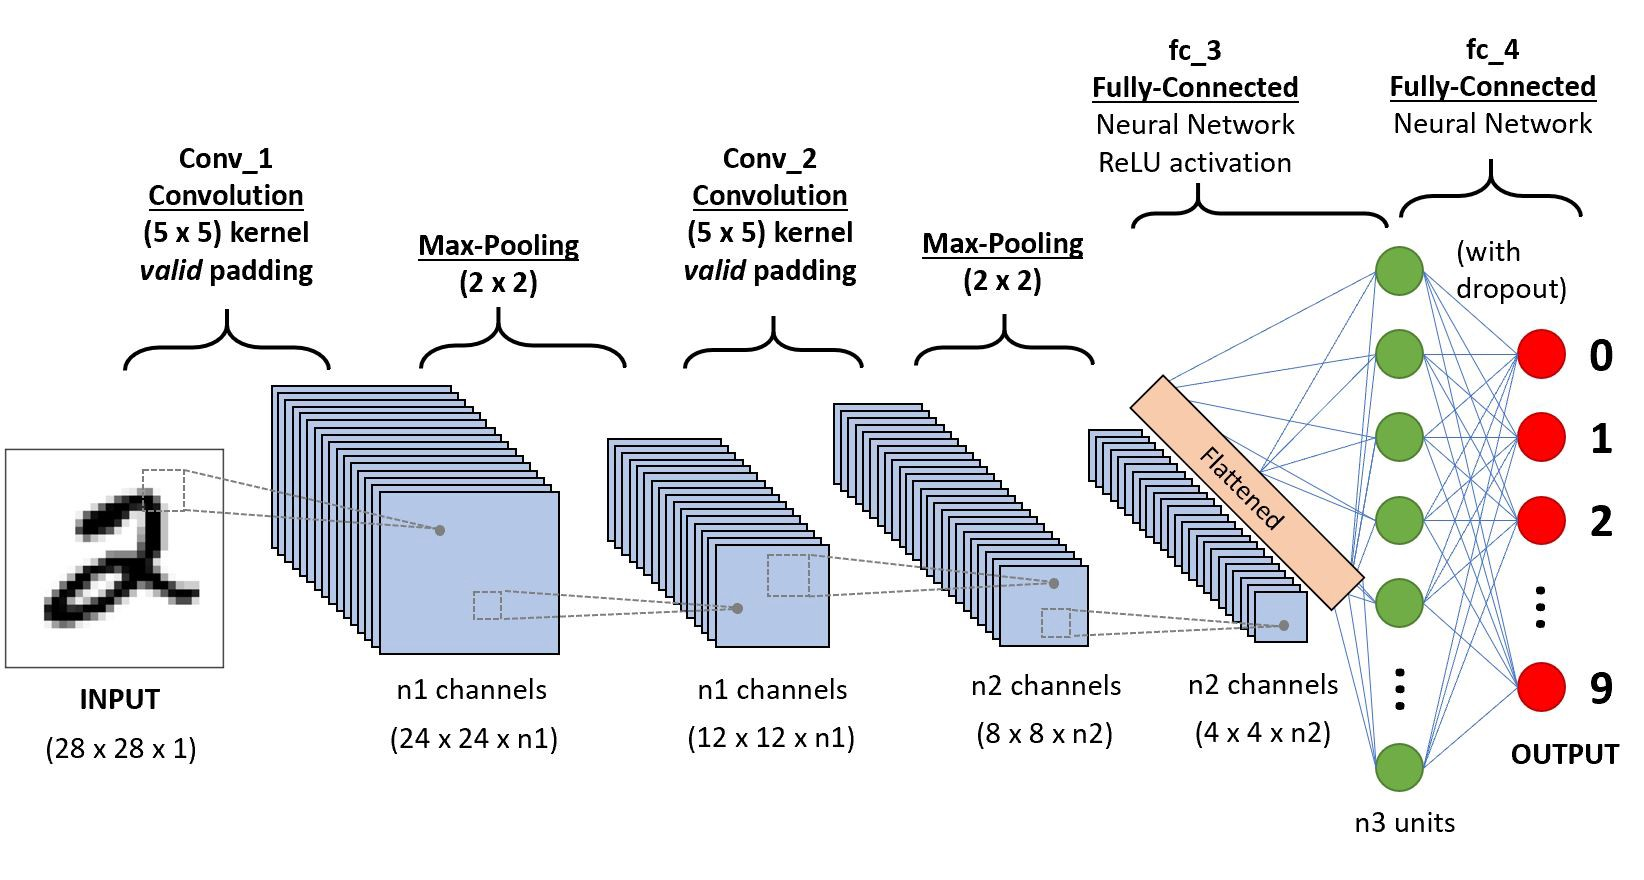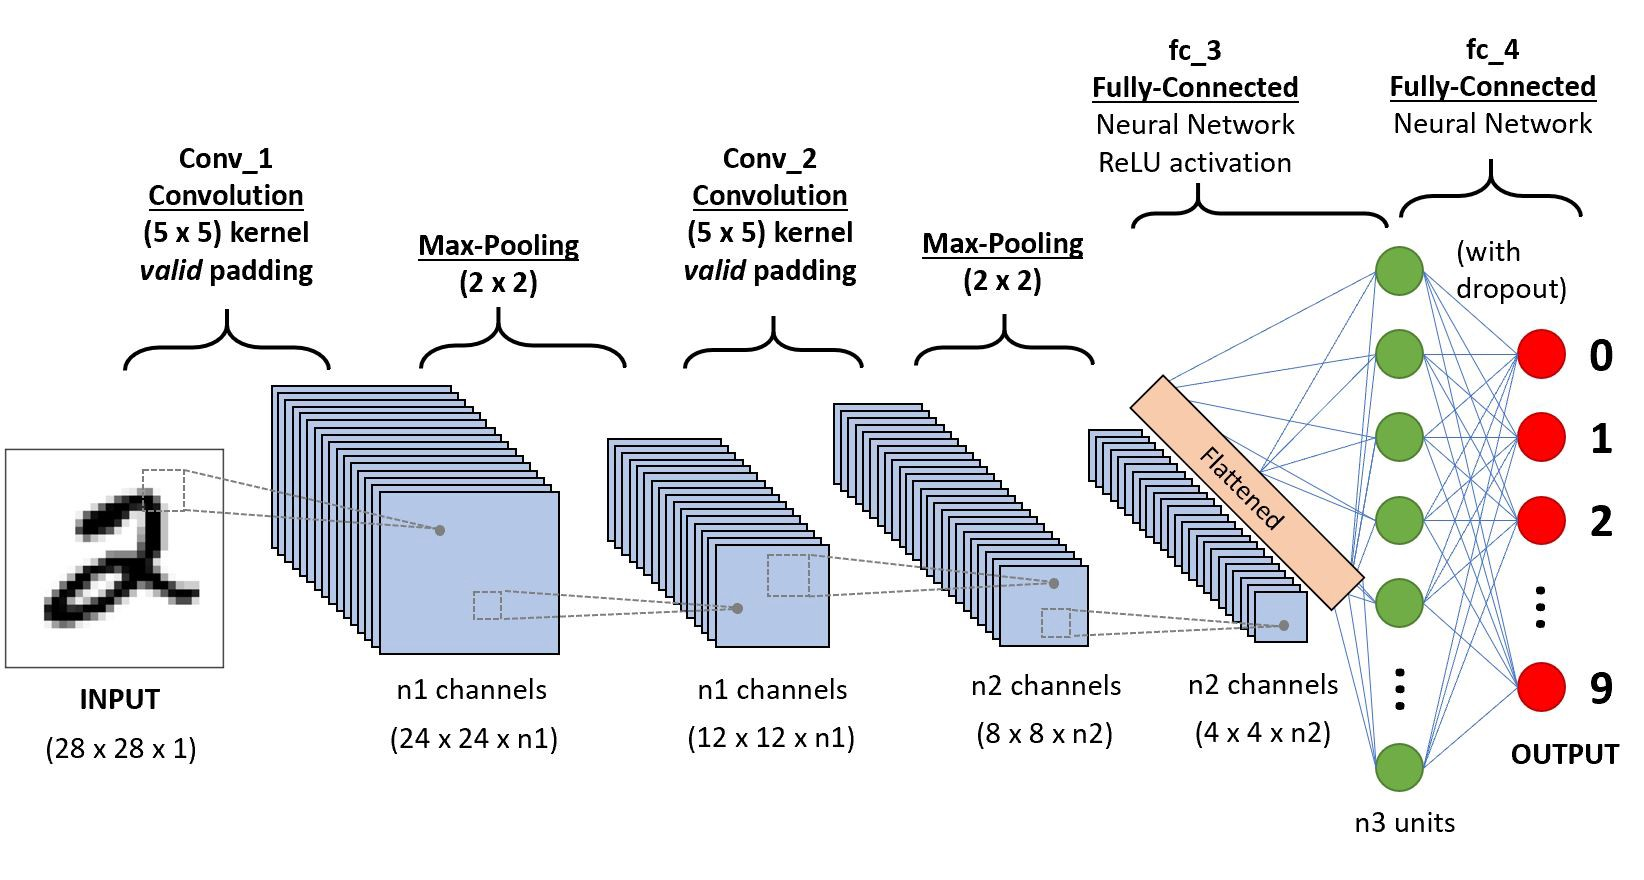

_Library Imports_

In [70]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import scipy.stats
import seaborn as sns
sns.set_context('notebook')

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D
from keras.layers import Flatten

from keras.utils.vis_utils import plot_model

import warnings
warnings.filterwarnings("ignore")

### II. Data:
An open question regarding which dataset will be used. Initial iteration will run on ​Churn Data.​ If time permits, I will revise the project and perform a second iteration, where I will create my
own dataset that will be generated using a simulation methodology (such as Lotka–Volterra).

In [71]:
df = pd.read_csv("Churn_Modelling.csv")

In [72]:
print(len(df.columns))
df

14


RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

In [73]:
df[df.columns]

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

### III. EDA

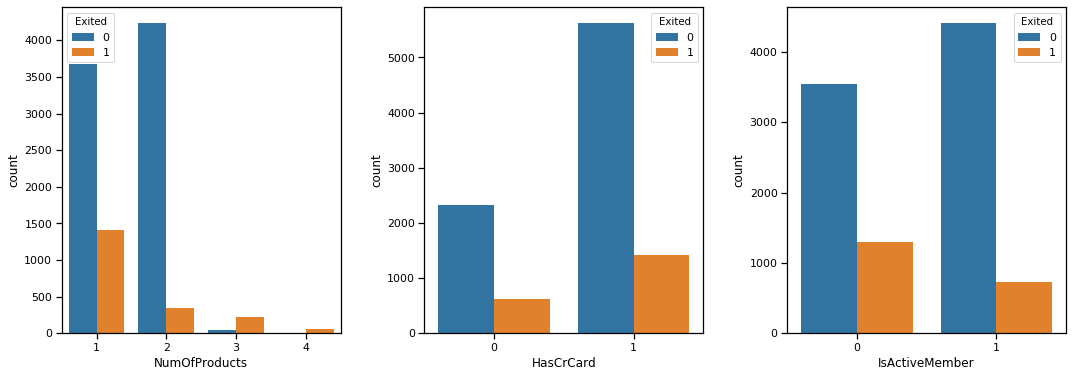

In [74]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = df, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = df, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = df, ax = ax[2])

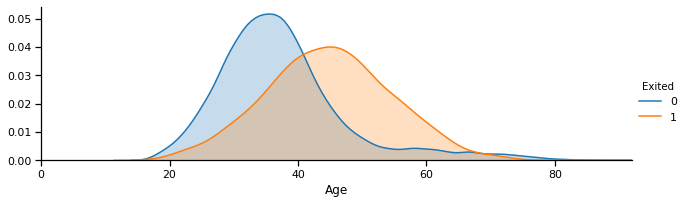

In [75]:
facet = sns.FacetGrid(df, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, df["Age"].max()))
facet.add_legend()

plt.show()

### IIV. Neural Network Models

The models and methods that will be applied are going to based on the Keras library. Firstly, the model will be made of the Keras ​Sequential object. Then a model summary will be composed for each ANN. The model will then be compiled and fit the data. Lastly, the effectiveness of the architecture will be examined by​ model.evalaute ​method.
These methods will be used and obtained from Keras’s Library. Moreover, this library will provide the different types of layers: Dense layer, Conv1D layer, Conv2D layer, Conv3D layer, and so on.

In [76]:
# Data columns type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [77]:
#Get Dummies
clean_df = pd.get_dummies(df)
clean_df

RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  ...  \
0                 1          1               1        101348.88  ...   
1                 1          0               1        112542.58  ...   
2                 3          1               0        113931.57  ...   
3                 2          0               0         93826.63  ...   
4                 1          1               1         79084.10  ...   
...             ...        ...             ...              ...  ...   
9995              2          1               0         96270.64  ...   
9996              1          1               1        101699.77  ...   
9997              1          0               1         42085.58  ...   
9998              2          1               0         92888.52  ...   
9999              1          1               0         38190.78  ...   

      Surname_Zubarev  Surname_Zubareva  Surname_Zuev  Surname_Zuyev  \
0                   0                 0             0              0   
1                   0                 0             0              0   
2                   0                 0             0              0   
3                   0                 0             0              0   
4                   0                 0             0              0   
...               ...               ...           ...            ...   
9995                0                 0             0              0   
9996                0                 0             0              0   
9997                0                 0             0              0   
9998                0                 0             0              0   
9999                0                 0             0              0   

      Surname_Zuyeva  Geography_France  Geography_Germany  Geography_Spain  \
0                  0                 1                  0                0   
1                  0                 0                  0                1   
2                  0                 1                  0                0   
3                  0                 1                  0                0   
4                  0                 0                  0                1   
...              ...               ...                ...              ...   
9995               0                 1                  0                0   
9996               0                 1                  0                0   
9997               0                 1                  0                0   
9998               0                 0                  1                0   
9999               0                 1                  0                0   

      Gender_Female  Gender_Male  
0                 1            0  
1                 1            0  
2                 1            0  
3                 1            0  
4                 1            0  
...             ...          ...  
9995              0            1  
9996              0            1  
9997              1            0  
9998              0            1  
9999              1            0  

[10000 rows x 2948 columns]

In [78]:
clean_df.shape

(10000, 2948)

In [79]:
# Data columns type
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 2948 entries, RowNumber to Gender_Male
dtypes: float64(2), int64(9), uint8(2937)
memory usage: 28.8 MB


In [80]:
# splitting the data into testing and training

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_df[clean_df.columns], clean_df['Exited'], test_size=0.33, random_state=42)


In [81]:
nsamples, nfeatures = X_train.shape
nclass = 2 # Output classe
nn_epoch = 10
ntimesteps = X_train.shape[1]

In [82]:
# X_train = X_train.reshape(nsamples, nfeatures)
# X_test = X_test.reshape(-1, nfeatures)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
ncats = y_test.shape[1]

In [83]:
model1 = Sequential()
model1.add(Dense(16, input_dim=nfeatures, activation='relu'))
model1.add(Dense(12, activation='relu'))
model1.add(Dense(nclass, activation='softmax'))

model2 = Sequential()
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(ntimesteps,nfeatures)))
model2.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model2.add(Dense(nclass, activation='softmax'))


In [85]:
#To visualize neural network
model1.summary()
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                47184     
_________________________________________________________________
dense_11 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 26        
Total params: 47,414
Trainable params: 47,414
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2946, 64)          566080    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2944, 64)          12352     
____________________________

In [86]:
model1.compile(loss='categorical_crossentropy', 
#               loss = 'binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

model2.compile(loss='categorical_crossentropy', 
#               loss = 'binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

In [87]:
# Training the NN
history = model2.fit(X_train, 
                    y_train,
                    epochs=nn_epoch, 
                    batch_size=10,
                    validation_data=(X_test, y_test)
                   )

ValueError: Error when checking input: expected conv1d_1_input to have 3 dimensions, but got array with shape (6700, 2948)

In [43]:
### score trained model
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', acc)

3300/3300 [==============================] - 0s 82us/step
Test loss: 18.312206513375948
Test accuracy: 0.8051515221595764


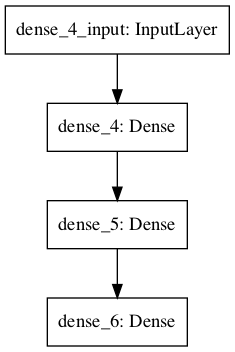

In [46]:
plot_model(model, show_shapes=False, show_layer_names=True)

### V. Accuracy Evaluation